# nx.draw可视化函数

使用NetworkX自带的可视化函数`nx.draw`，绘制不同风格的图。设置节点尺寸、节点颜色、节点边缘颜色、节点坐标、连接颜色等。

同济子豪兄 2022-7-9

参考文档：https://networkx.org/documentation/stable/auto_examples/drawing/plot_four_grids.html#sphx-glr-auto-examples-drawing-plot-four-grids-py

## 导入工具包

In [2]:
# 图数据挖掘
import networkx as nx

import numpy as np

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 创建4x4网格图

In [3]:
G = nx.grid_2d_graph(4, 4)

## 原生可视化

In [4]:
# 使用Fruchterman-Reingold计算过的布局
pos = nx.spring_layout(G, seed=123)
"""
circular_layout：节点在一个圆环上均匀分布
random_layout：节点随机分布
shell_layout：节点在同心圆上分布
spring_layout： 用Fruchterman-Reingold算法排列节点
spectral_layout：根据图的拉普拉斯特征向量排列节
布局也可用pos参数指定，例如，nx.draw(G, pos = spring_layout(G)) 这样指定了networkx上以中心放射状分布.
"""

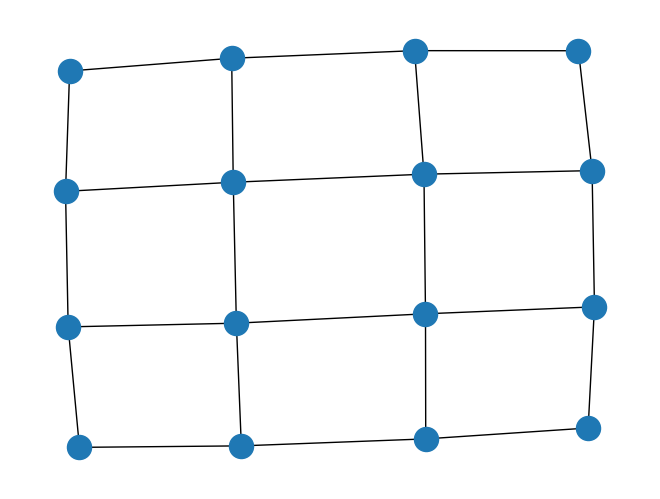

In [6]:
# 绘制
nx.draw(G, pos)

## 不显示节点

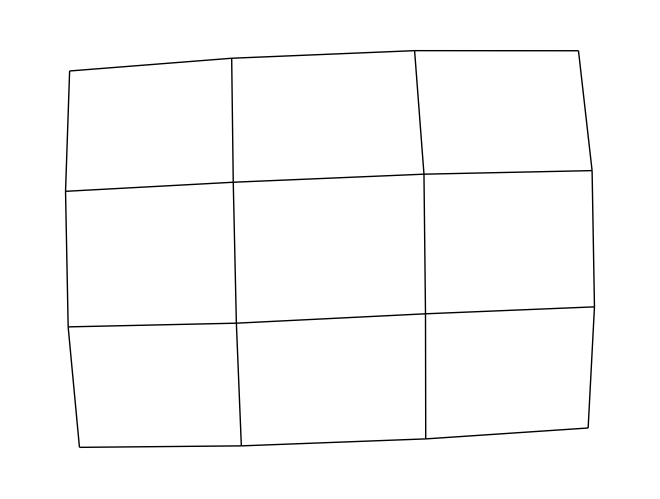

In [7]:
# 将node_size设置为0
nx.draw(G, pos, node_size=0, with_labels=False)

## 设置颜色

In [8]:
# 连接个数
len(G.edges())

24

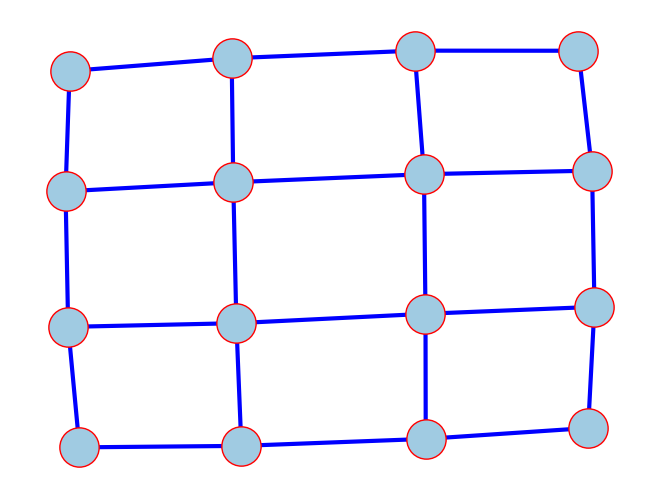

In [10]:
nx.draw(
    G,                         # 图
    pos,                       # 布局
    node_color='#A0CBE2',      # 节点颜色
    edgecolors='red',          # 节点外边缘的颜色
    edge_color="blue",         # edge的颜色
    # edge_cmap=plt.cm.coolwarm, # 配色方案
    node_size=800,             # 节点大小
    with_labels=False,         # 是否显示节点label
    width=3,                   # 连接的宽度
)

## 有向图

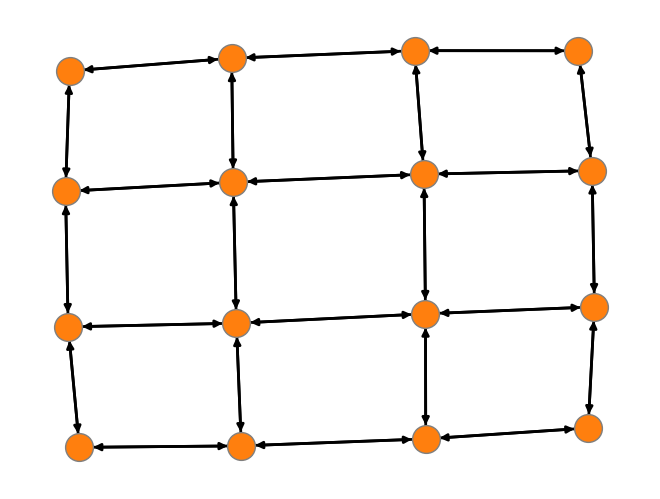

In [13]:
nx.draw(
    G.to_directed(),  # 转换为有向图
    pos,
    node_color="tab:orange",
    node_size=400,
    with_labels=False,
    edgecolors="tab:gray",
    arrowsize=10,  # 箭头的大小
    width=2,
)

## 设置每个节点的坐标

### 无向图

In [14]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

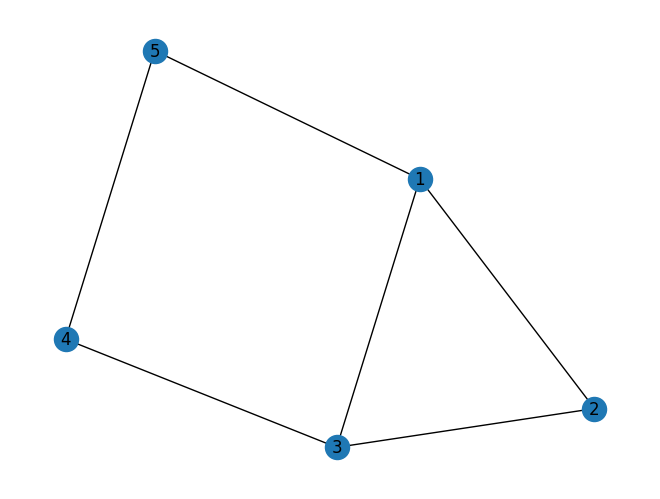

In [15]:
nx.draw(G, with_labels=True)

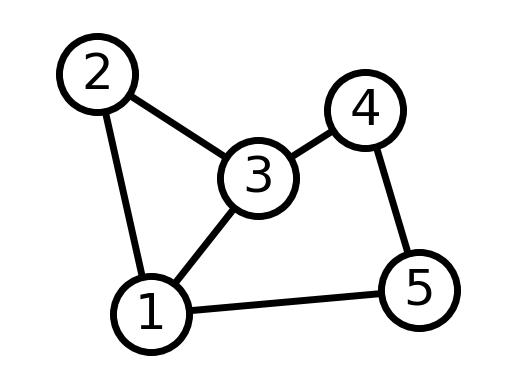

In [21]:
# 设置每个节点可视化时的坐标
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

# 设置其它可视化样式
options = {
    "font_size": 36,    # label显示的大小
    "node_size": 3000,  # 节点大小
    "node_color": "white",
    "edgecolors": "black", 
    "linewidths": 5, # 节点线宽
    "width": 5, # edge线宽
}

nx.draw_networkx(G, pos, **options)  # 使用draw_networkx

ax = plt.gca()
ax.margins(0.20) # 在图的边缘留白，防止节点被截断
plt.axis("off")
plt.show()

### 有向图

In [22]:
G = nx.DiGraph([(0, 3), (1, 3), (2, 4), (3, 5), (3, 6), (4, 6), (5, 6)])

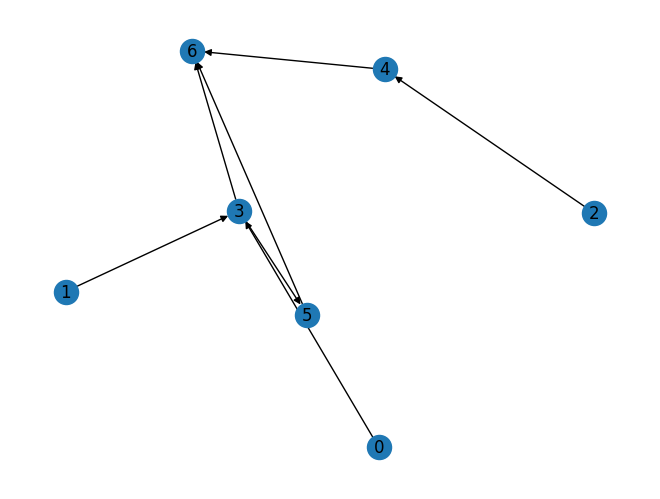

In [23]:
nx.draw(G, with_labels=True)

In [24]:
# 可视化时每一列包含的节点
left_nodes = [0, 1, 2]
middle_nodes = [3, 4]
right_nodes = [5, 6]

In [25]:
# 可视化时每个节点的坐标
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

In [26]:
pos

{0: (0, 0),
 1: (0, 1),
 2: (0, 2),
 3: (1, 0.5),
 4: (1, 1.5),
 5: (2, 0.5),
 6: (2, 1.5)}

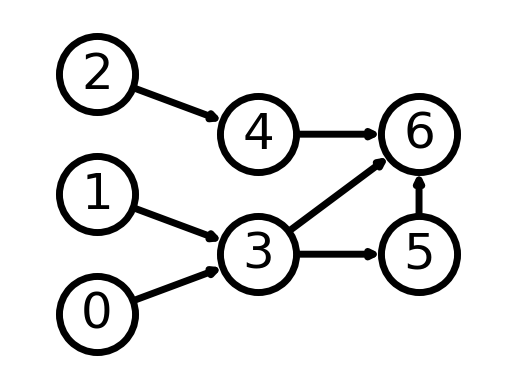

In [27]:
nx.draw_networkx(G, pos, **options)

ax = plt.gca()
ax.margins(0.20) # 在图的边缘留白，防止节点被截断
plt.axis("off")
plt.show()

### 再来一个案例

In [28]:
G = nx.house_graph()

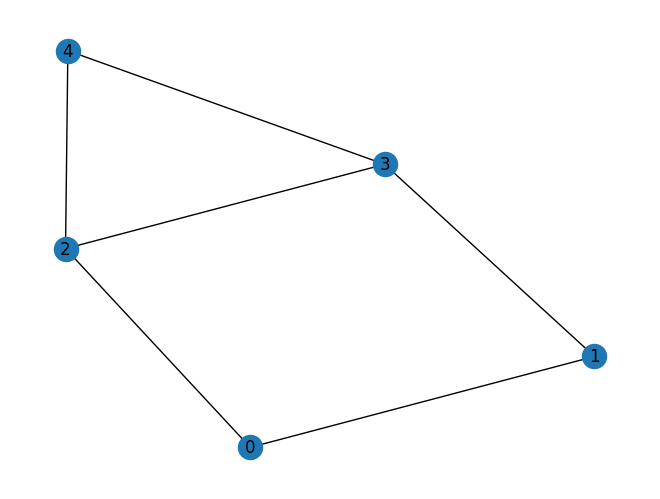

In [29]:
nx.draw(G, with_labels=True)

In [30]:
# 设置节点坐标
pos = {0: (0, 0), 1: (1, 0), 2: (0, 1), 3: (1, 1), 4: (0.5, 2.0)}

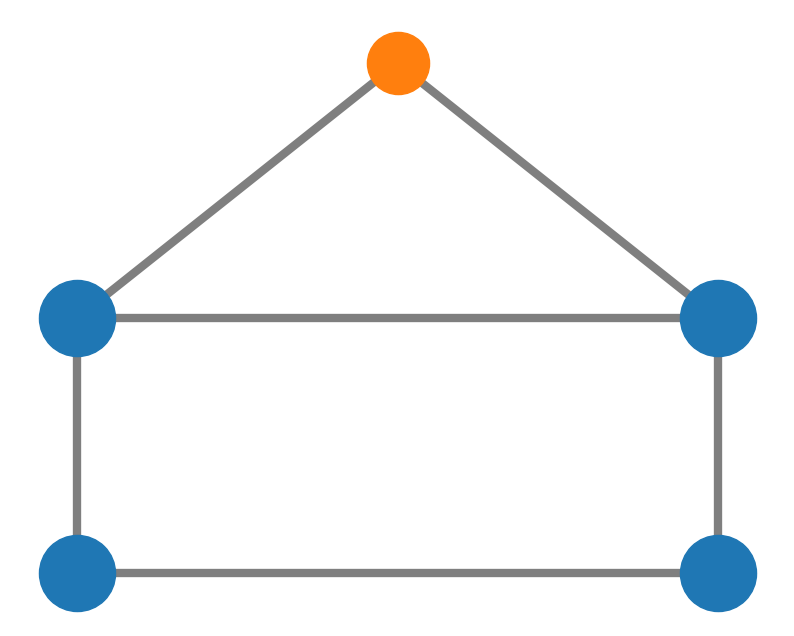

In [31]:
plt.figure(figsize=(10,8))
# 绘制“墙角”的四个节点
nx.draw_networkx_nodes(G, pos, node_size=3000, nodelist=[0, 1, 2, 3], node_color="tab:blue")
# 绘制“屋顶”节点
nx.draw_networkx_nodes(G, pos, node_size=2000, nodelist=[4], node_color="tab:orange")
# 绘制连接
nx.draw_networkx_edges(G, pos, alpha=0.5, width=6)
plt.axis("off") # 去掉坐标轴
plt.show()